<a href="https://colab.research.google.com/github/fedhere/FDSfE_FBianco/blob/main/HW6/Solution_titanic.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import drive
drive.mount('/content/gdrive', force_remount=True)

Mounted at /content/gdrive


In [ ]:
#cd /content/drive/My Drive

In [ ]:
cd /content/gdrive/MyDrive/

/content/gdrive/MyDrive


In [ ]:
ls kag*

kaggle.json

kaggleTitanic:
gender_submission.csv  TitanicTree      titanic.zip
test.csv               TitanicTree.pdf  train.csv


commenting the next cell cause I have alredy run the notebook and that needs to be done only once

In [ ]:
#!chmod 600 kaggle.json

In [ ]:
import json
envs = json.load(open("kaggle.json", "r"))

In [ ]:
import os
os.environ["KAGGLE_USERNAME"] = envs['username']
os.environ["KAGGLE_KEY"] = envs['key']

In [ ]:
!pip install kaggle

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
!kaggle datasets list

ref                                                             title                                       size  lastUpdated          downloadCount  voteCount  usabilityRating  
--------------------------------------------------------------  -----------------------------------------  -----  -------------------  -------------  ---------  ---------------  
akshaydattatraykhare/diabetes-dataset                           Diabetes Dataset                             9KB  2022-10-06 08:55:25          14340        433  1.0              
swaptr/layoffs-2022                                             Layoffs 2022                                29KB  2022-11-16 20:46:46            762         27  1.0              
akshaydattatraykhare/data-for-admission-in-the-university       Data for Admission in the University         4KB  2022-10-27 11:05:45           3250         72  1.0              
aneesayoub/world-universities-ranking-2022                      World Universities Ranking 2022          

In [ ]:
!mkdir TitanicKaggleData

mkdir: cannot create directory ‘TitanicKaggleData’: File exists


In [ ]:
cd TitanicKaggleData

/content/gdrive/MyDrive/TitanicKaggleData


In [ ]:
!kaggle competitions download -c titanic 

titanic.zip: Skipping, found more recently modified local copy (use --force to force download)


In [ ]:
ls

gender_submission.csv  test.csv  titanic.zip  train.csv


commenting the next cell cause I have alredy run the notebook and that needs to be done only once

In [ ]:
#!unzip titanic.zip

In [ ]:
import pandas as pd
titanic = pd.read_csv("train.csv")[["Survived", "Pclass", "Age", "Sex"]]
titanic.shape

(891, 4)

In [ ]:
titanic

,Survived,Pclass,Age,Sex
0,0,3,22.0,male
1,1,1,38.0,female
2,1,3,26.0,female
3,1,1,35.0,female
4,0,3,35.0,male
...,...,...,...,...
886,0,2,27.0,male
887,1,1,19.0,female
888,0,3,NaN,female
889,1,1,26.0,male


In [ ]:
titanic["gender"] = titanic["Sex"].map({"male":0, "female":1})

In [ ]:
titanic

,Survived,Pclass,Age,Sex,gender
0,0,3,22.0,male,0
1,1,1,38.0,female,1
2,1,3,26.0,female,1
3,1,1,35.0,female,1
4,0,3,35.0,male,0
...,...,...,...,...,...
886,0,2,27.0,male,0
887,1,1,19.0,female,1
888,0,3,NaN,female,1
889,1,1,26.0,male,0


In [ ]:
titanic.drop("Sex", axis=1, inplace=True)

In [ ]:
titanic

,Survived,Pclass,Age,gender
0,0,3,22.0,0
1,1,1,38.0,1
2,1,3,26.0,1
3,1,1,35.0,1
4,0,3,35.0,0
...,...,...,...,...
886,0,2,27.0,0
887,1,1,19.0,1
888,0,3,NaN,1
889,1,1,26.0,0


In [ ]:
titanic.describe()

,Survived,Pclass,Age,gender
count,891.000000,891.000000,714.000000,891.000000
mean,0.383838,2.308642,29.699118,0.352413
std,0.486592,0.836071,14.526497,0.477990
min,0.000000,1.000000,0.420000,0.000000
25%,0.000000,2.000000,20.125000,0.000000
50%,0.000000,3.000000,28.000000,0.000000
75%,1.000000,3.000000,38.000000,1.000000
max,1.000000,3.000000,80.000000,1.000000


In [ ]:
titanic.dropna(how="any", axis=0, inplace=True)

In [ ]:
titanic.describe()

,Survived,Pclass,Age,gender
count,714.000000,714.000000,714.000000,714.000000
mean,0.406162,2.236695,29.699118,0.365546
std,0.491460,0.838250,14.526497,0.481921
min,0.000000,1.000000,0.420000,0.000000
25%,0.000000,1.000000,20.125000,0.000000
50%,0.000000,2.000000,28.000000,0.000000
75%,1.000000,3.000000,38.000000,1.000000
max,1.000000,3.000000,80.000000,1.000000


In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(titanic[["Pclass",	"Age",	
                                                             "gender"]], 
                                                    titanic["Survived"], 
                 train_size=0.75, random_state=123)
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((535, 3), (179, 3), (535,), (179,))

In [ ]:
from sklearn import tree
clf = tree.DecisionTreeClassifier(max_depth=3, random_state=123)
clf.fit(X_train, y_train)
print("accuracy on training data {:.2}".format(clf.score(X_train, y_train)))

accuracy on training data 0.81


In [ ]:
print("accuracy on test data {:.2}".format(clf.score(X_test, y_test)))

accuracy on test data 0.76


In [ ]:
from sklearn.ensemble import RandomForestClassifier
clf_rf = RandomForestClassifier(max_depth=3)
clf_rf.fit(X_train, y_train)
print("accuracy on training data {:.2}".format(clf_rf.score(X_train, y_train)))

accuracy on training data 0.82


In [ ]:
from sklearn.ensemble import GradientBoostingClassifier
clf_gbd = GradientBoostingClassifier(max_depth=3, random_state=145)
clf_gbd.fit(X_train, y_train)
print("accuracy on training data {:.2}".format(clf_gbd.score(X_train, y_train)))

accuracy on training data 0.88


In [ ]:
print("accuracy on training data {:.2}".format(clf_gbd.score(X_test, y_test)))

accuracy on training data 0.82


In [ ]:
clf_rf.feature_importances_

array([0.27014515, 0.1607211 , 0.56913374])

In [ ]:
import numpy as np
index = np.argsort(clf_rf.feature_importances_)
np.argsort(clf_rf.feature_importances_)

array([1, 0, 2])

In [ ]:
clf_rf.feature_importances_

array([0.27014515, 0.1607211 , 0.56913374])

In [ ]:
columns = np.array(["Pclass",	"Age",	"gender"])[index]

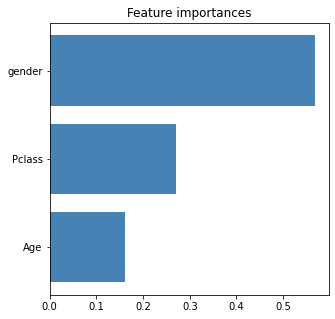

In [ ]:
import pylab as plt
plt.figure(figsize=(5,5))
plt.title("Feature importances")
plt.barh([0, 1, 2], clf_rf.feature_importances_[index],
        color="Steelblue", align="center")
plt.yticks(range(len(columns)), columns);
plt.show()


# how to get feature importance with uncertainty:
each trees in the forest makes its own decision and uses the features their own way. So each tree has a different feature importance. Thus we can represent the feature importance overall as the mean of the trees importances, and the spread across the trees as its uncertainty (1 standard deviation of the distribution). 

Here is how you do it

In [ ]:
importances = [tree.feature_importances_ for tree in clf_rf.estimators_]
len(clf_rf.estimators_), len(importances)

(100, 100)

In [ ]:
# these the same
np.array(importances).mean(axis=0),  clf_rf.feature_importances_


(array([0.27014515, 0.1607211 , 0.56913374]),
 array([0.27014515, 0.1607211 , 0.56913374]))

In [ ]:
# this is the error on the feature importance
np.array(importances).std(axis=0)

array([0.17166411, 0.11310389, 0.2280589 ])

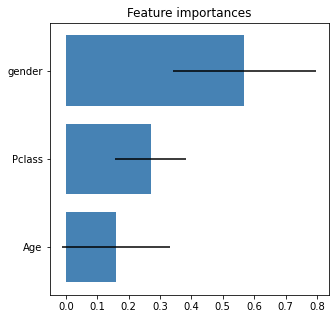

In [ ]:
plt.figure(figsize=(5,5))
plt.title("Feature importances")
plt.barh([0, 1, 2], clf_rf.feature_importances_[index],
         xerr=np.array(importances).std(axis=0),
        color="Steelblue", align="center")
plt.yticks(range(len(columns)), columns);
plt.show()